In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('train.csv')

In [21]:
data = data.to_numpy()

In [22]:
data.shape

(42000, 785)

In [25]:
Y_temp = data[:,0]
Y = Y_temp.reshape(-1)
Y = np.eye(10)[Y]
print(Y)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
Y_temp = data[:,0]

Y = np.zeros((X.shape[0], 10))
for i in Y_temp:
    for j in range(10):
        if Y_temp[i]==j:
            Y[i][j]=1
        
print(Y)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
X = data[ : , 1:]

X = np.reshape(X, (Y.shape[0], 28, 28))

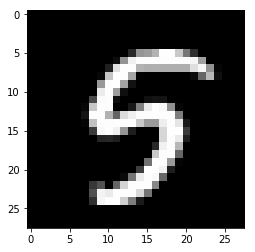

In [17]:
plt.imshow(X[8], cmap = 'gray', vmin=0, vmax = 255)

## Neural Network with predetermined number of layers

We start with a three layers network for digit recognition. Let's train the weigths through backpropagation for this task. 

In [26]:
def random_initialisation():
    
    """Function supposed to initialize with random numbers the weights and bias 
    for a neural network of 3 layers with respectively 16, 16 and 10 neurons
    Our input layer is of size 784 (28x28 pixel image)"""
    
    W1 = np.random.randn(16, 784)
    b1 = np.zeros((16, 1))
    
    W2 = np.random.randn(16, 16)
    b2 = np.zeros((16, 1))
    
    W3 = np.random.randn(10, 16)
    b3 = np.zeros((10, 1))

    
    parameter ={
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    
    return parameters

In [3]:
def sigmoid(Z):
    A = 1/(1 + npexp(-Z))
    cache = Z
    return A, cache

In [ ]:
def relu(Z):
    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)
    cache = Z
    return A, cache

In [ ]:
def linear_forward(W, A, b):
    Z = np.dot(W, A)+b
    
    cache  = (W, A, b)
    
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(W, A_prev, b)
        A , activation_cache= sigmoid(Z)
    
    else if activation == "relu
        Z, linear_cache = linear_forward(W, A_prev, b)
        A , activation_cache= relu(Z)
     
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
        
    return A, cache

In [ ]:
def compute_cost(A, Y):
    
    cost = (-1/m)* np.sum(Y.dot(np.log(A)) + (1-Y).dot(np.log(1 - A)))
    
    cost = np.squeeze(cost)
    assert(cost.shape==())
    
    return cost

In [ ]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True)
     
    dZ[Z <= 0] = 0 #which is equal to 0 when Z <= 0
    
    assert(dZ.shape==Z.shape)
    
    return dZ

In [ ]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True)
    
    s = sigmoid(Z)
    dZ = dA * s * (1-s)  #sigmoid derivative
    
    assert(dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters)
    
    for i in range L:
        parameters["W"+ str(i+1)]=parameters["W"+str(i+1)]-learning_rate*grads["dW"+str(i+1)]
        parameters["b"+ str(i+1)]=parameters["b"+str(i+1)]-learning_rate*grads["db"+str(i+1)]
        
    return parameters

In [ ]:
def three_layers_network(X, Y, learning_rate = 0.0075, num_iterations = 3000, ):
    
    grads = {}
    costs = []
    L = len(caches) #the number of layers
    m = X.shape[1]
    A0 = X
    
    
    #initializing
    parameters = random_initialisation()
    
    
    for n in range num_iterations: 
        #forwardProp
        Z1, _ = linear_forward(parameters["W1"], A0, parameters["b1"])
        A1, cache1 = activation_function(Z1, "relu") 

        Z2, _ = linear_forward(parameters["W2"], A1, parameters["b2"])
        A2, cache2 = activation_function(Z2, "relu") 

        Z3, _ = linear_forward(parameters["W3"], A2, parameters["b3"])
        A3, cache3 = activation_function(Z3, "sigmoid") 
        
        
        #compute cost
        cost = compute_cost(A3, Y)
        
        #backpropagation
        dA3 = - (np.divide(Y, A3) - np.divide(1-Y, 1-A3))

        dA2, dW3, db3 = linear_activation_backward(dA3, cache3, "sigmoid")
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "relu")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        grads['dW1']= dW1
        grads['db1']= db1
        grads['dW2']= dW2
        grads['db2']= db2
        grads['dW3']= dW3
        grads['db3']= db3

        parameters = update_parameters(parameters, grads, learning_rate)
    
        #print cost every 100 iterations
        if n%100==0:
            print("Cost after iteration {} : {}".format(n, np.squeeze(cost)))
            costs.append(cost)
    
    #let's plot cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('num iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters